<a href="https://colab.research.google.com/github/stories2/Kangnam_ML/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn

     |████████████████████████████████| 540 kB 8.7 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=5b48387871d07b1267b03e5f873ae72173e023c1de72db434830b6bbaf0cffb1
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [34]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

In [35]:
x, y = mglearn.datasets.make_wave(n_samples=100)

In [36]:
train_input, test_input, train_target, test_target = train_test_split(x, y, train_size=0.7, random_state=1004)

In [37]:
knr = KNeighborsRegressor(n_jobs=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_jobs=3)

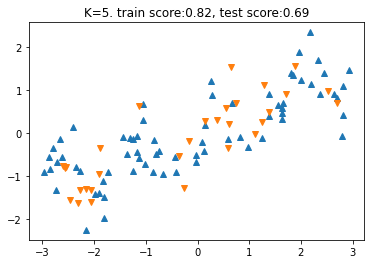

In [38]:
plt.plot(train_input,train_target, '^')
plt.plot(test_input, test_target, 'v')
plt.title("K={}. train score:{:.2f}, test score:{:.2f}".format(
     knr.n_neighbors, knr.score(train_input, train_target), knr.score(test_input, test_target)))
plt.show()

In [39]:
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

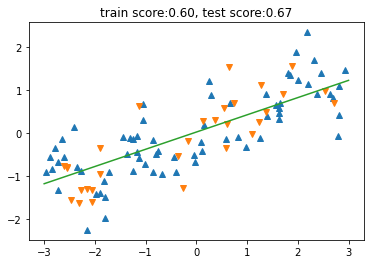

In [40]:
plt.plot(train_input,train_target, '^')
plt.plot(test_input, test_target, 'v')
plt.plot([-3, 3], [-3 * lr.coef_ + lr.intercept_, 3 * lr.coef_ + lr.intercept_])

plt.title("train score:{:.2f}, test score:{:.2f}".format(
     lr.score(train_input, train_target), lr.score(test_input, test_target)))
plt.show()

In [41]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

train_poly[:2], test_poly[:2]

(array([[ 1.37432805, -1.17231738],
        [ 7.03044338, -2.65149833]]), array([[1.22190509, 1.10539816],
        [0.35040587, 0.59195091]]))

In [42]:
lr2 = LinearRegression()
lr2.fit(train_poly, train_target)

LinearRegression()

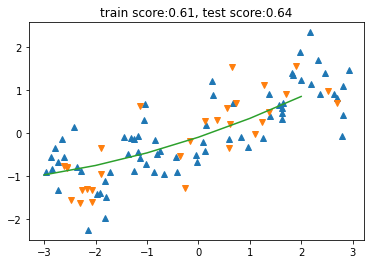

In [43]:
point = np.arange(-3, 3)
plt.plot(train_input,train_target, '^')
plt.plot(test_input, test_target, 'v')
plt.plot(point, lr2.coef_[0] * point ** 2 + lr2.coef_[1] * point + lr2.intercept_)

plt.title("train score:{:.2f}, test score:{:.2f}".format(
     lr2.score(train_poly, train_target), lr2.score(test_poly, test_target)))
plt.show()

## 실험 조건(환경)을 자세히 기술하시요.

- wave 데이터 100개 생성 후 학습, 테스트 데이터 분리
- KNR의 n = 3, 일차 회귀 분석, 이차 회귀 분석 예측

## 어느 회귀 모델이 최고인가? 각자 결론을 내리고 이유를 적으시오(논하시오)

KNR 이 가장 좋은 회귀 모델이라 생각합니다.

회귀 예측을 하기에는 데이터의 속성이 규칙적이지 않고 랜덤으로 퍼져있어 

가까운 이웃을 이용해 예측을 하는 알고리즘이 더 우수한 결과를 반환하기 때문입니다.

In [44]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [45]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, train_size=0.7, random_state=1004)

In [46]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [47]:
knr = KNeighborsRegressor(n_jobs=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_jobs=3)

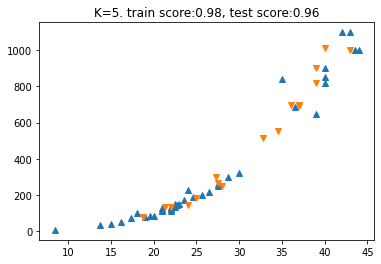

In [48]:
plt.plot(train_input,train_target, '^')
plt.plot(test_input, test_target, 'v')
plt.title("K={}. train score:{:.2f}, test score:{:.2f}".format(
     knr.n_neighbors, knr.score(train_input, train_target), knr.score(test_input, test_target)))
plt.show()

In [49]:
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

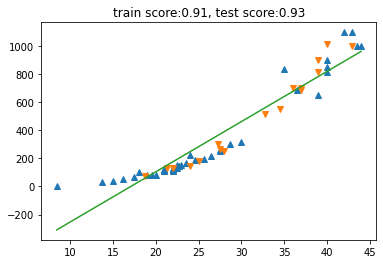

In [50]:
plt.plot(train_input,train_target, '^')
plt.plot(test_input, test_target, 'v')
plt.plot([perch_length.min(), perch_length.max()], [perch_length.min() * lr.coef_ + lr.intercept_, perch_length.max() * lr.coef_ + lr.intercept_])

plt.title("train score:{:.2f}, test score:{:.2f}".format(
     lr.score(train_input, train_target), lr.score(test_input, test_target)))
plt.show()

In [51]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [52]:
lr2 = LinearRegression()
lr2.fit(train_poly, train_target)

LinearRegression()

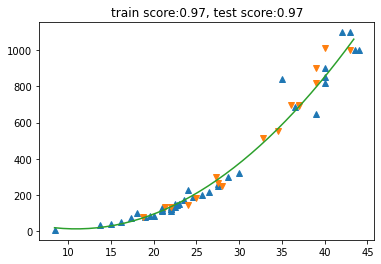

In [54]:
point = np.arange(perch_length.min(), perch_length.max())
plt.plot(train_input,train_target, '^')
plt.plot(test_input, test_target, 'v')
plt.plot(point, lr2.coef_[0] * point ** 2 + lr2.coef_[1] * point + lr2.intercept_)

plt.title("train score:{:.2f}, test score:{:.2f}".format(
     lr2.score(train_poly, train_target), lr2.score(test_poly, test_target)))
plt.show()

## 실험 조건(환경)을 자세히 기술하시요.

- 농어 데이터 100개 생성 후 학습, 테스트 데이터 분리
- KNR의 n = 3, 일차 회귀 분석, 이차 회귀 분석 예측

## 어느 회귀 모델이 최고인가? 각자 결론을 내리고 이유를 적으시오(논하시오)

이차 회귀 분석이 가장 좋은 모델이라 생각합니다. 

데이터 시각화를 한 결과 무게가 증가할 수록 길이의 증가량이 급격하게 높아졌고 이는 이차 방정식 형태를 띠우고 있기 때문입니다.

또한 실제로 예측 결과가 이차 회귀 직선이 더 높았습니다.